In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

/tmp/ipykernel_8118/2451341646.py:4: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [15]:
# for gauss:
n_points = list(range(1, 21,2))
eps_list = [0.0, 0.1, 0.5, 0.75, 1.0]
num_repetition = 100

adv_test_loss = np.zeros([len(eps_list), len(n_points), num_repetition], dtype=np.float64)

for i in range(len(eps_list)):
    arr = np.genfromtxt('tmp_{}.csv'.format(i),delimiter=',', skip_header = 1)
    arr_pruned = arr[:,1:]
    adv_test_loss[i] = arr_pruned
    
adv_test_loss.shape

(5, 10, 100)

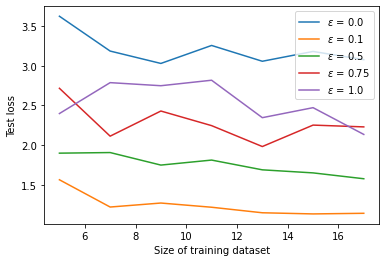

In [19]:
x=list(range(5,19,2)) 

for eps_idx in range(len(eps_list)):
  eps = eps_list[eps_idx]
  test_eps=np.zeros(len(x))
  
  for n in range(3,10):
    n=int(n)
    test_eps[n-3]=np.mean(adv_test_loss[eps_idx,n-1,1:])
    
  plt.plot(x, test_eps,label="$\epsilon$ = {}".format(eps))
  #ysmoothed = gaussian_filter1d(test_eps, sigma=2)
  #plt.plot(x, ysmoothed,label="$\epsilon$ = {}".format(eps))
  
plt.legend(loc='upper right')
plt.xlabel('Size of training dataset')
plt.ylabel('Test loss')
#plt.yscale('log')
plt.savefig('Class_loss_gauss_filter2.pdf')
#files.download('Class_loss_gauss_filter2.pdf')
plt.show()

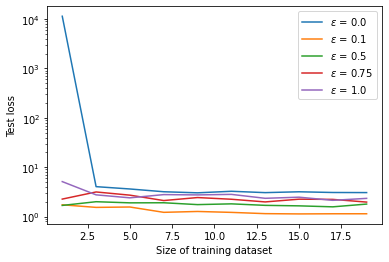

In [10]:
x=n_points 

for eps_idx in range(len(eps_list)):
  eps = eps_list[eps_idx]
  test_eps=np.zeros(len(x))
  
  for n in range(1,len(n_points)+1):
    n=int(n)
    test_eps[n-1]=np.mean(adv_test_loss[eps_idx,n-1,1:])
    
  plt.plot(x, test_eps,label="$\epsilon$ = {}".format(eps))
  #ysmoothed = gaussian_filter1d(test_eps, sigma=2)
  #plt.plot(x, ysmoothed,label="$\epsilon$ = {}".format(eps))
  
plt.legend(loc='upper right')
plt.xlabel('Size of training dataset')
plt.ylabel('Test loss')
plt.yscale('log')
plt.savefig('Class_loss_gauss_filter2.pdf')
#files.download('Class_loss_gauss_filter2.pdf')
plt.show()